In [1]:
from fuzzy_art import *
import sklearn.datasets as ds
import sklearn.decomposition as dcp
import matplotlib.pyplot as plt

In [2]:
iris = ds.load_iris()
data = iris['data'] / np.max(iris['data'], axis=0)
label_true = iris['target']
# pca
pca = dcp.PCA(n_components=2)
pca_xy = pca.fit_transform(data)
print(pca.explained_variance_ratio_)
print(pca.singular_values_)

[0.92138578 0.05142129]
[4.9602239  1.17179601]


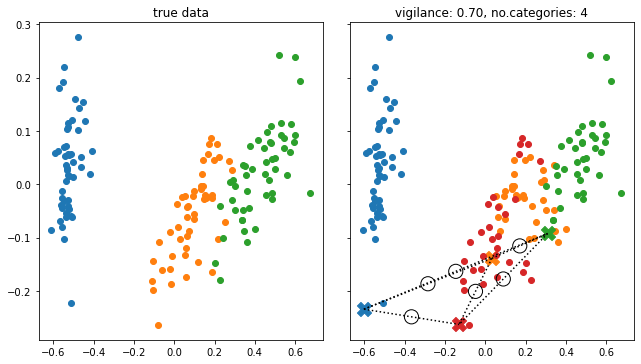

In [51]:
fig, axs = plt.subplots(1, 2,
                        figsize=(9, 5), sharex=True, sharey=True)
fig.tight_layout()

# plot true
for cat_true in range(3):
    axs[0].scatter(*np.where(label_true == cat_true, pca_xy.T, None))
axs[0].set_title('true data')

# use FuzzyART
# init
rho = 0.7
net = FuzzyART(alpha=0.5, rho=rho) # for the current iris data, rho near 0.65 seems the best in clustering data

# train
net.train(data, epochs=100) # each epoch, all data is shuffled
label_pred = net.test(data).astype(int)

cat_number = net.w.shape[0]
replay_cat = net.w[:, :4]
cat_centre = pca.transform(replay_cat)

# plot cats
for cat_pred, cat_x, cat_y in zip(range(cat_number), *cat_centre.T):
    c = next(axs[1]._get_lines.prop_cycler)['color']
    axs[1].scatter(*np.where(label_pred == cat_pred, pca_xy.T, None), color = c) # all training samples
    axs[1].scatter(cat_x, cat_y, marker = 'X', s = 200, color = c) # categorical centre
axs[1].set_title('vigilance: {:.2f}, no.categories: {}'.format(rho, cat_number))

# plot inters
ls_interidx, ls_intercat = [], []
for i in range(cat_number):
    for j in range(i + 1, cat_number):
        interidx = np.array([i, j])
        ls_interidx.append(interidx) 
        
        intercat = np.mean(net.w[interidx, :4], axis = 0)
        ls_intercat.append(intercat)
        
        intercatpca = pca.transform([intercat])
        axs[1].scatter(*intercatpca.T, marker = 'o', s = 200, edgecolors = 'k', facecolors='none')
        axs[1].plot(*cat_centre[interidx].T, c = 'k', ls = 'dotted')

replay_intercat = np.array(ls_intercat)

In [53]:
replay_cat, replay_intercat # consolidate old episode? creative with interpolation?

(array([[0.5443038 , 0.52272727, 0.14492754, 0.04      ],
        [0.70035601, 0.56285511, 0.58171988, 0.48703125],
        [0.73417722, 0.59090909, 0.73913043, 0.72      ],
        [0.62025316, 0.45454545, 0.43478261, 0.4       ]]),
 array([[0.62232991, 0.54279119, 0.36332371, 0.26351562],
        [0.63924051, 0.55681818, 0.44202899, 0.38      ],
        [0.58227848, 0.48863636, 0.28985507, 0.22      ],
        [0.71726661, 0.5768821 , 0.66042516, 0.60351562],
        [0.66030459, 0.50870028, 0.50825125, 0.44351562],
        [0.67721519, 0.52272727, 0.58695652, 0.56      ]]))

In [49]:
data

array([[0.64556962, 0.79545455, 0.20289855, 0.08      ],
       [0.62025316, 0.68181818, 0.20289855, 0.08      ],
       [0.59493671, 0.72727273, 0.1884058 , 0.08      ],
       [0.58227848, 0.70454545, 0.2173913 , 0.08      ],
       [0.63291139, 0.81818182, 0.20289855, 0.08      ],
       [0.6835443 , 0.88636364, 0.24637681, 0.16      ],
       [0.58227848, 0.77272727, 0.20289855, 0.12      ],
       [0.63291139, 0.77272727, 0.2173913 , 0.08      ],
       [0.55696203, 0.65909091, 0.20289855, 0.08      ],
       [0.62025316, 0.70454545, 0.2173913 , 0.04      ],
       [0.6835443 , 0.84090909, 0.2173913 , 0.08      ],
       [0.60759494, 0.77272727, 0.23188406, 0.08      ],
       [0.60759494, 0.68181818, 0.20289855, 0.04      ],
       [0.5443038 , 0.68181818, 0.15942029, 0.04      ],
       [0.73417722, 0.90909091, 0.17391304, 0.08      ],
       [0.72151899, 1.        , 0.2173913 , 0.16      ],
       [0.6835443 , 0.88636364, 0.1884058 , 0.16      ],
       [0.64556962, 0.79545455,